In [4]:
# load libraries.

import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# load data into a dataframe.

df = pd.read_csv('train.csv')

In [6]:
# check the shape of the dataframe

print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

Number of observations: 1460
Number of features: 81


In [7]:
# check the datatype of each column.

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
# Caculate proportion of missing values
# in each column and filter ones with more than 20% NULL values.

missing = df.isna().sum()
missing = (missing/len(df))*100
missing = missing.loc[missing > 20].sort_values(ascending=False)

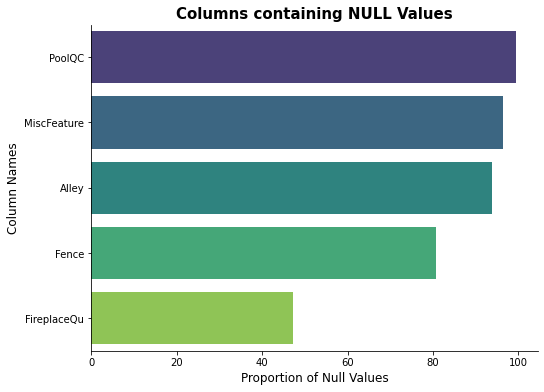

In [9]:
# Generate horizontal bar plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.barplot(x=missing.values, y=missing.index, palette='viridis')

plt.xlabel('Proportion of Null Values', color='black', fontsize=12)
plt.title("Columns containing NULL Values", fontsize=15, weight='bold')
plt.ylabel("Column Names", color='black', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [10]:
# drop columns with more than 80% missing NULL values.

df = df.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'])

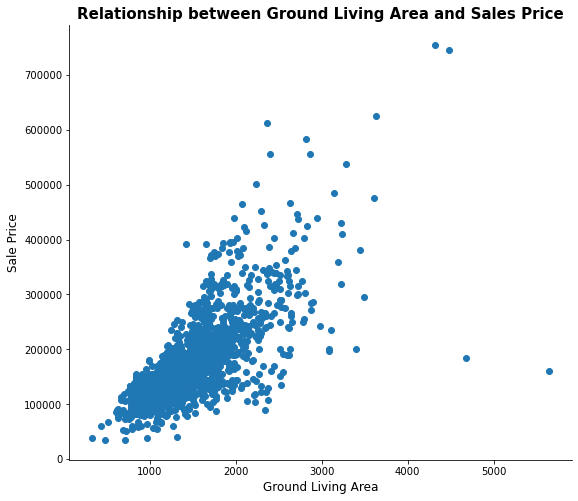

In [11]:
# Scatter plot to visualize relationship
# between Ground Living Area and Sale Price.

fig, ax = plt.subplots(figsize=(9, 8))
plt.scatter(x=df.GrLivArea, y=df.SalePrice)
ax.set_xlabel("Ground Living Area", color='black', fontsize=12)
ax.set_ylabel("Sale Price", color='black', fontsize=12)
ax.set_title("Relationship between Ground Living Area and Sales Price",
             fontsize=15, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

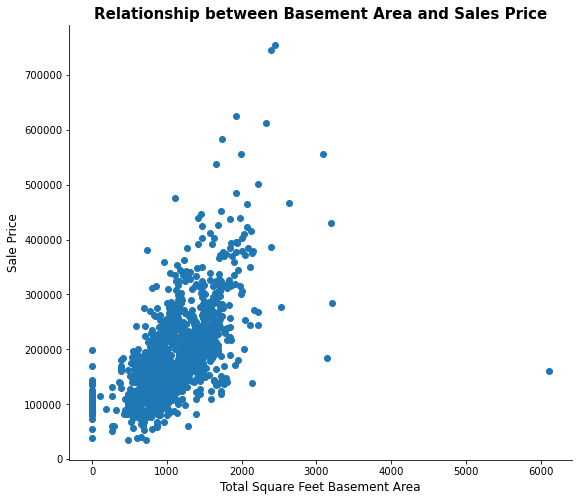

In [12]:
# Scatter plot to visualize relationship
# between Ground Basement Area and Sale Price.

fig, ax = plt.subplots(figsize=(9, 8))
plt.scatter(x=df.TotalBsmtSF, y=df.SalePrice)
ax.set_xlabel("Total Square Feet Basement Area", color='black', fontsize=12)
ax.set_ylabel("Sale Price", color='black', fontsize=12)
ax.set_title("Relationship between Basement Area and Sales Price",
             fontsize=15, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

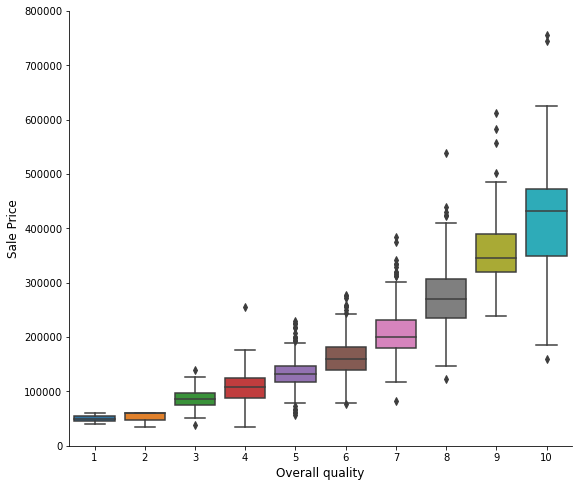

In [13]:
# Box plot to visualize relationship
# between Overall Quality and Sale Price.

f, ax = plt.subplots(figsize=(9, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000)
ax.set_xlabel("Overall quality", color='black', fontsize=12)
ax.set_ylabel("Sale Price", color='black', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

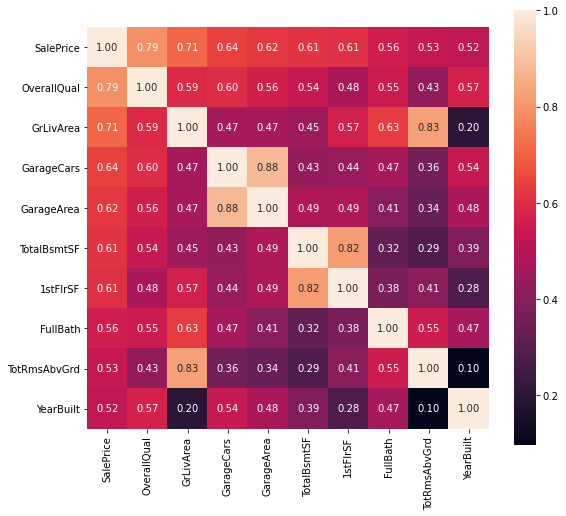

In [14]:
# Heatmap to visualize correlation
# between strongly correated predictor variables with Sale Price.

f, ax = plt.subplots(figsize=(9, 8))
corrmat = df.corr()
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

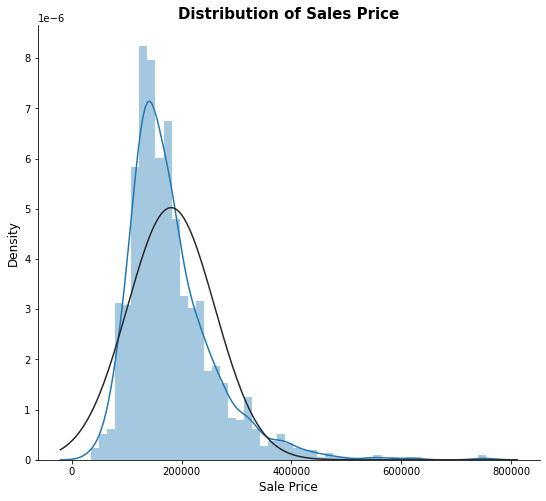

In [15]:
# Histogram to visualize distribution of Sale Price.

fig, ax = plt.subplots(figsize=(9, 8))
sns.distplot(df['SalePrice'], fit=norm)
ax.set_xlabel("Sale Price", color='black', fontsize=12)
ax.set_ylabel("Density", color='black', fontsize=12)
ax.set_title("Distribution of Sales Price", fontsize=15, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

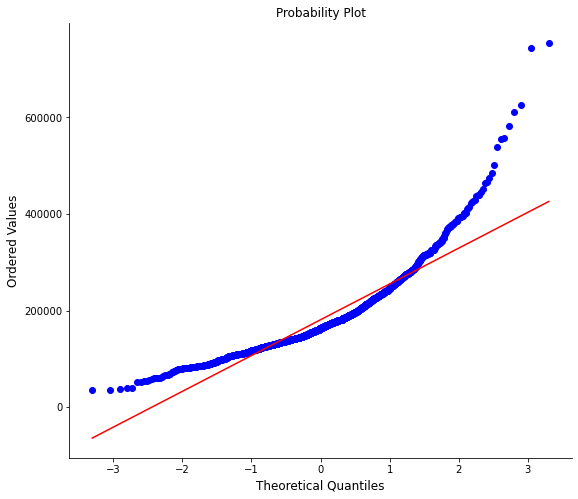

In [16]:
# Probability plot to check deviation of Sale Price distribution
# from normal distribution.

fig, ax = plt.subplots(figsize=(9, 8))
res = stats.probplot(df['SalePrice'], plot=plt)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Ordered Values', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [17]:
# Apply log transformation on Sale Price.

df['SalePrice'] = np.log(df['SalePrice'])

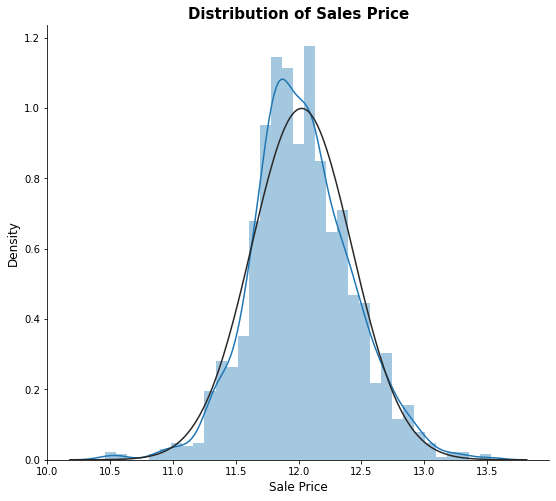

In [18]:
# Histogram to visualize distribution of Sale Price.

fig, ax = plt.subplots(figsize=(9, 8))
sns.distplot(df['SalePrice'], fit=norm)
ax.set_xlabel("Sale Price", color='black', fontsize=12)
ax.set_ylabel("Density", color='black', fontsize=12)
ax.set_title("Distribution of Sales Price", fontsize=15, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

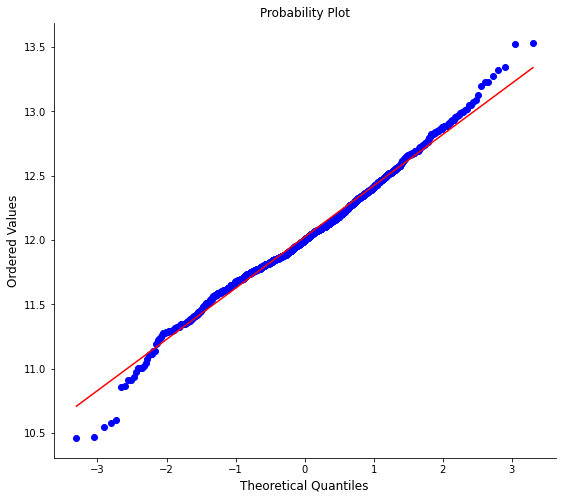

In [19]:
# Probability plot to check deviation of Sale Price distribution
# from normal distribution.

fig, ax = plt.subplots(figsize=(9, 8))
res = stats.probplot(df['SalePrice'], plot=plt)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Ordered Values', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()